# Assignment 1 : Distributions
#### Test the correlation of the age distribution of Male vs Female riders and of day vs night riders
data: January 2015

In [1]:
import pylab as pl
import pandas as pd
import numpy as np
import urllib
%pylab inline

import os

Populating the interactive namespace from numpy and matplotlib


In [2]:
url1 = "https://raw.githubusercontent.com/Tengf/PUI2015_tzheng/master/citibikes/201501-citibike-tripdata.csv"
f = urllib.urlopen(url1)
df = pd.read_csv(f)
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960,2
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963,1
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974,1
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969,1
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977,1


In [3]:
print df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')


## BY GENDER

In [4]:
df['ageM'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]
df['ageF'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 2)]

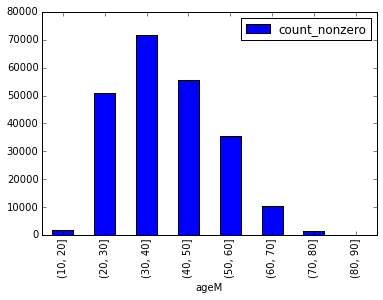

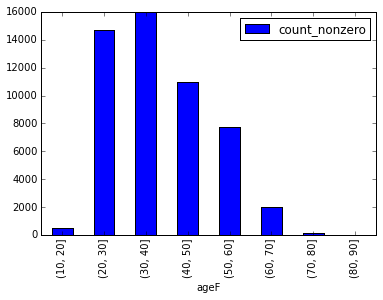

In [5]:
bins = np.arange(10, 99, 10)
df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).plot(kind='bar')
df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).plot(kind='bar')

          count_nonzero
ageM                   
(10, 20]       0.001656
(20, 30]       0.060938
(30, 40]       0.052105
(40, 50]       0.018598
(50, 60]       0.010887
(60, 70]       0.003129
(70, 80]       0.000113
(80, 90]       0.000000


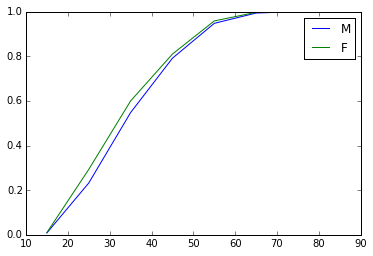

In [6]:
# aggregate the cumulative sum of each age group
csM=df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).cumsum()
csF=df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).cumsum()

print np.abs(csM / csM.max()-csF / csF.max())

# plot and find KS
pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.legend()

#KS = np.nanmax(np.array(csM/csM.max())-np.array(csF/csF.max()))
#print "KS",KS

In [7]:
import scipy.stats

In [8]:
df_cleanF=df.ageF.dropna()
df_cleanM=df.ageM.dropna()
print len(df_cleanF)
print len(df_cleanM)

df_cleanM = np.random.choice(df_cleanM,len(df_cleanF),replace=False)
print len(df_cleanM)

52093
227764
52093


### Pearson's test for correlation

In [9]:
pearson = scipy.stats.pearsonr(df_cleanM, df_cleanF)
print pearson

(-0.00086812665793356341, 0.84293899963962371)


### Spearman's test for correlation¶

In [10]:
spearman = scipy.stats.spearmanr(df_cleanM, df_cleanF)
print spearman

SpearmanrResult(correlation=-0.0010696102501520383, pvalue=0.80713719454373312)


### KS tests to compare 2 samples

In [11]:
ks=scipy.stats.ks_2samp(df.ageM, df.ageF)
print ks

Ks_2sampResult(statistic=0.61519793242561782, pvalue=0.0)


#### <font color='blue'>Because p value equals 0, the Null hypothesis is rejected.</font>

## BY DAY & NIGHT 

According to http://www.sunrise-and-sunset.com/en/sun/united-states/new-york-city/2015/ 
daytime:7:00-17:00,
nighttime:17:00-7:00

In [12]:
df['date'] = pd.to_datetime(df['starttime'])
df['ageD'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['date'].dt.hour<17)\
                                   & (df['date'].dt.hour>=7)]
df['ageN'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['date'].dt.hour>=17)\
                                   |(df['date'].dt.hour<7)]

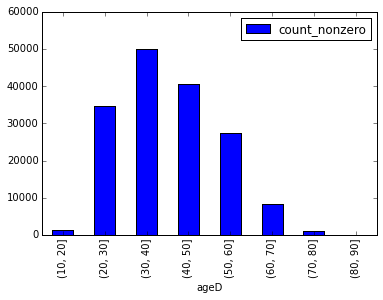

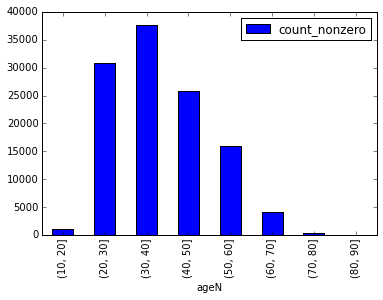

In [13]:
bins = np.arange(10, 99, 10)
df.ageD.groupby(pd.cut(df.ageD, bins)).agg([count_nonzero]).plot(kind='bar')
df.ageN.groupby(pd.cut(df.ageN, bins)).agg([count_nonzero]).plot(kind='bar')

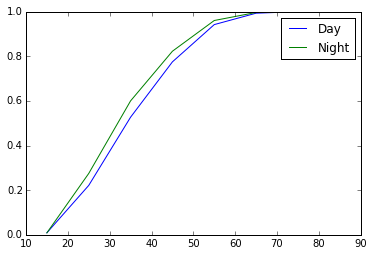

In [14]:
csD = df.ageD.groupby(pd.cut(df.ageD, bins)).agg([count_nonzero]).cumsum()
csN = df.ageN.groupby(pd.cut(df.ageN, bins)).agg([count_nonzero]).cumsum()

pl.plot(bins[:-1] + 5, csD / csD.max(), label = "Day")
pl.plot(bins[:-1] + 5, csN / csN.max(), label = "Night")

pl.legend()

In [15]:
df_cleanD=df.ageD.dropna()
df_cleanN=df.ageN.dropna()
print len(df_cleanD)
print len(df_cleanN)

df_cleanD = np.random.choice(df_cleanD,len(df_cleanN),replace=False)
print len(df_cleanD)

163880
116044
116044


### Pearson’s test 

In [16]:
pearson = scipy.stats.pearsonr(df_cleanD, df_cleanN)
print pearson

(-0.0011880442661169096, 0.68569376842165719)


### Spearman’s test

In [17]:
spearman = scipy.stats.spearmanr(df_cleanD, df_cleanN)
print spearman

SpearmanrResult(correlation=2.0011309675360698e-05, pvalue=0.99456100226768152)


### KS test

In [18]:
import scipy.stats
ks = scipy.stats.ks_2samp(df.ageN.dropna(), df.ageD.dropna())
print ks

Ks_2sampResult(statistic=0.075842139095194938, pvalue=0.0)


#### <font color='blue'>Because p value equals 0, the Null hypothesis is rejected.</font>